### EXPLORE Data Science Academy Classification Hackathon
South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
From South African Government

#### Problem Statement 

With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, you will take text which is in any of South Africa's (lang_id) 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

### My Approach to analyse various lang_id

1. Exploratory Data Analysis

2. Data Preprocessing

3. Classification Models

4. Evaluation


#### Import libraries and datasets

In [8]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.style as style
import nltk
import string
import re
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics


from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.metrics import make_scorer

import matplotlib.pyplot as plt
%matplotlib inline

# Style
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
style.use('seaborn-poster')

In [9]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\malef\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

#### Loading our dataset

We will be loading the train csv file using pandas. For this, we will be using read_csv file

In [10]:
# importing the dataset
train = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')
sample_submission = pd.read_csv('sample_submission.csv')

#### Basic Data Exploration

In this step, I will perform the below operations to check what the data set consists of. We will check the following:

- head of the dataset
- the shape of the dataset
- info of the dataset
- summary of the dataset

1. The head function will give us the top records in the data set. By default, it will show you the top 5 records.


2. The shape attribute tells us a number of observations and variables we have in the data set. It is used to check the dimension of data. The train data set has 33000 observations and 2 variables in the data set.

#### Train

In [11]:
train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


From the table above, we observe that the lang_id are divided into 11 unique_values:

- [ven] Venda: Text related to venda language
- [tsn] Tsonga: Text related to tsonga language
- [nso] Northern Sotho: Text related to northern sotho language
- [nbl] Ndebele: Text related to ndebele language
- [xho] Xhosa: Text related to Xhosa language
- [eng] English: Text related to the english language
- [zul] Zulu: Text related to the Zulu language
- [ssw] Siswati: Text related to siswati language
- [afr] Afrikaans: Text related to afrikaans language
- [sot] Sotho: Text related to the sotho language
- [tso] sign Language: Text related to sign language

#### info() is used to check the infomation about the data and the datatypes of each respective attribute

In [12]:
# There are no null values in the data

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [13]:
train.shape

(33000, 2)

#### The describe method will help to see the number of count of the data the uniqe values, top and the most frequent

In [14]:
train.describe()

,lang_id,text
count,33000,33000
unique,11,29948
top,tsn,ngokwesekhtjheni yomthetho ophathelene nalokhu...
freq,3000,17


In [15]:
train['lang_id'].value_counts().sum()

33000

In [16]:
test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


In [18]:
test.value_counts().sum()

5682

#### Now, lets visualise the unique values in each Feature Column

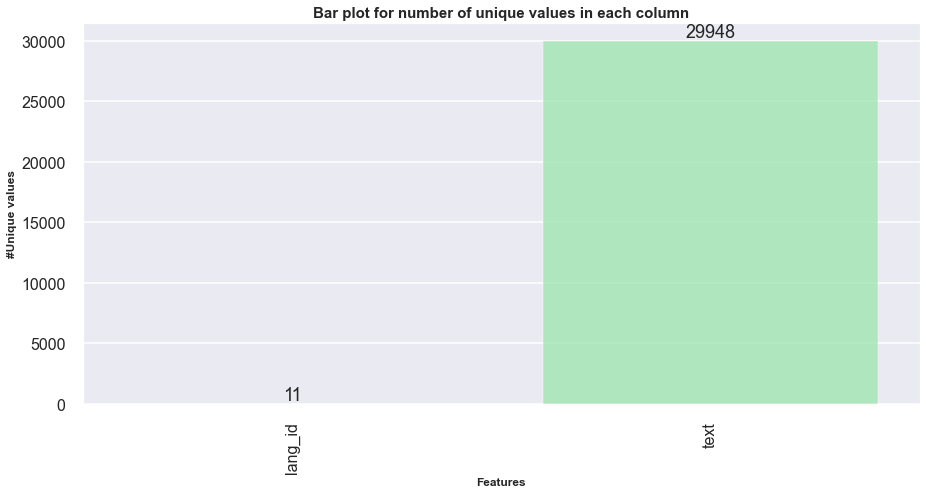

In [19]:
unique_train = pd.DataFrame()
unique_train['Features'] = train.columns
unique=[]
for i in train.columns:
    unique.append(train[i].nunique())
unique_train['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_train['Features'], y=unique_train['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

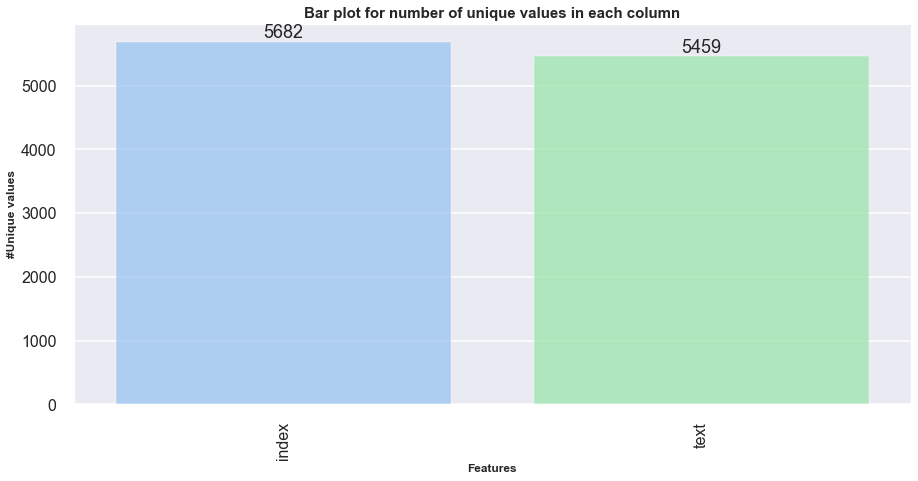

In [20]:
unique_test = pd.DataFrame()
unique_test['Features'] = test.columns
unique=[]
for i in test.columns:
    unique.append(test[i].nunique())
unique_test['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_test['Features'], y=unique_test['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

#### Lets create a visual to look at the target variable distribution, a sentiment countplot

C:\Users\malef\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


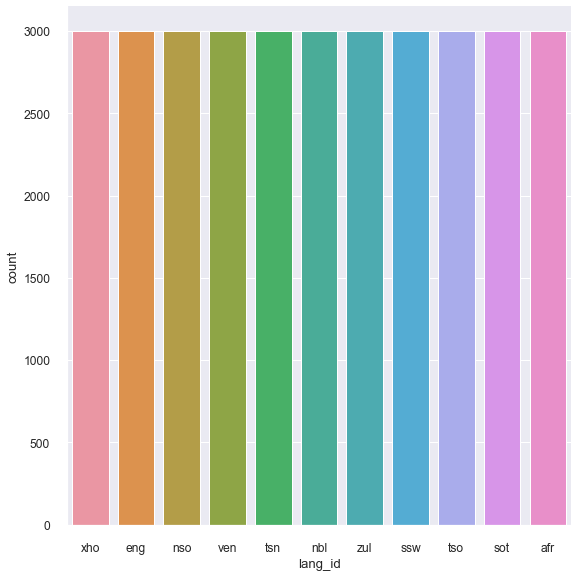

In [21]:
sns.set(font_scale=1.1)
sns.catplot("lang_id", data=train, kind="count", height=8)

### Feature Extraction

The objective of the this step is to ensure that the data input (which is the called the corpus in Natural Language Processing) to the model is in the most useful form: one that facilitates the extraction of “maximum” information. In order to do this, the following were carried out:

- Removal of punctuation (” “) from each sentence in the predictor variable.
- Retain only alphabetic words i.e. exclude numbers and alphanumeric letters.
- Removal of common English stop words. Stop words are basically words whose presence do not alter the meaning of a    sentence.
- Eliminating all one-lettered words e.g a, I
- Converting all of the words to lower case for consistency.

In [22]:
def clean_text(text):
    
     # will split and join the words
    text=' '.join(text.split())
   
    
    # will replace newline with space
    text = re.sub("\n"," ",text)
    
    # will convert to lower case
    text = text.lower()
    
     # replace the html characters with " "
    text=re.sub('<.*?>', ' ', text)
    
    return text

In [23]:
X = train['text']
y = train['lang_id']

In [24]:
# Replace '.txt' with 'text file'
train["text"] = train["text"].str.replace(".txt", " text file")
test["text"] = test["text"].str.replace(".txt", " text file")

#### Splitting Our Dataset into Training And Testing Dataset

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20)

### Creating pipelines and building models

In [26]:
classifiers = [LinearSVC(random_state=42),
                SVC(),
                DecisionTreeClassifier(),
                RandomForestClassifier(n_estimators=100, max_depth=2,
                                     random_state=0, class_weight="balanced"),
                MLPClassifier(alpha=1e-5,
                             hidden_layer_sizes=(5, 2),
                             random_state=42),
               LogisticRegression(random_state=42,
                                  multi_class='ovr',
                                  n_jobs=1,
                                  C=1e5,
                                  max_iter=4000),
               KNeighborsClassifier(n_neighbors=5),
               MultinomialNB(),
                  ComplementNB(),
               SGDClassifier(loss='hinge',
                             penalty='l2',
                             alpha=1e-3,
                             random_state=42,
                             max_iter=5,
                             tol=None)
                ]


In [27]:
def models_building(classifiers, X_train, y_train, X_val, y_val):
   

    models_summary = {}

    
    for clf in classifiers:
        clf_text = Pipeline([('tfidf', TfidfVectorizer(min_df=1,
                                                       max_df=0.9,
                                                       ngram_range=(1, 2))),
                             ('clf', clf)])
       
    
        start_time = time.time()
        clf_text.fit(X_train, y_train)
        predictions = clf_text.predict(X_val)
        run_time = time.time()-start_time

       
    
        models_summary[clf.__class__.__name__] = {
            'F1-Macro': metrics.f1_score(y_val,
                                         predictions,
                                         average='macro'),
            'F1-Accuracy': metrics.f1_score(y_val, predictions,
                                            average='micro'),
                                            'F1-Weighted': metrics.f1_score(y_val,
                                            predictions,
                                            average='weighted'),
            'Execution Time': run_time}

    return pd.DataFrame.from_dict(models_summary, orient='index')

In [28]:
classifiers_train = models_building(classifiers, X_train, y_train, X_val, y_val)
trained = classifiers_train.sort_values('F1-Macro', ascending=False)
trained

,F1-Macro,F1-Accuracy,F1-Weighted,Execution Time
MultinomialNB,0.998445,0.998485,0.998485,32.828975
ComplementNB,0.998140,0.998182,0.998181,6.821747
LogisticRegression,0.997823,0.997879,0.997879,170.124008
LinearSVC,0.997502,0.997576,0.997577,11.136334
SVC,0.996570,0.996667,0.996674,440.445930
SGDClassifier,0.989888,0.990152,0.990121,25.280382
KNeighborsClassifier,0.968421,0.969091,0.968848,1529.302594
DecisionTreeClassifier,0.945763,0.946818,0.946804,34.722612
RandomForestClassifier,0.791137,0.789697,0.791239,8.208495
MLPClassifier,0.740453,0.778636,0.735470,3664.413840


#### train-test split for validation

In [29]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.01)

##### Validation

In [30]:
# Creating a pipeline for the gridsearch
param_grid = {'alpha': [0.1, 1, 5, 10]}  # setting parameter grid

tuned = Pipeline([('tfidf', TfidfVectorizer(min_df=2,
                                                max_df=0.9,
                                                ngram_range=(1, 2))),
                      ('mnb', GridSearchCV(MultinomialNB(),
                                           param_grid=param_grid,
                                           cv=5,
                                           n_jobs=-1,
                                           scoring='f1_weighted'))
                      ])


# Fitting the model
tuned.fit(X_train, y_train)  


# predicting the fit on validation set
y_pred_mnb = tuned.predict(X_val) 


print(classification_report(y_val, y_pred_mnb))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00        28
         eng       1.00      1.00      1.00        28
         nbl       1.00      1.00      1.00        33
         nso       1.00      1.00      1.00        29
         sot       1.00      1.00      1.00        25
         ssw       1.00      1.00      1.00        26
         tsn       1.00      1.00      1.00        38
         tso       1.00      1.00      1.00        26
         ven       1.00      1.00      1.00        40
         xho       1.00      1.00      1.00        21
         zul       1.00      1.00      1.00        36

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



In [31]:
submission_traintest = pd.DataFrame(test['index'])
submission_traintest['lang_id'] = tuned.predict(test['text'])
submission_traintest.to_csv('Thembinkosi_Malefo_Classification_Hack.csv', index=False)